# House Price Prediction Model

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

## EDA

### Fetch Dataset Path

In [2]:
cwd = os.getcwd()

In [ ]:
cwd

In [3]:
name = 'housing.csv'

In [4]:
def get_dataset_path(name):
    file_name = name
    search_dir = os.getcwd()
    for roots, dirs, files in os.walk(search_dir):
        if file_name in files:
            dataset_path = os.path.join(roots, file_name)
            return dataset_path
        else:
            continue
    return False

In [5]:
dataset_path = get_dataset_path(name)
dataset_path

'D:\\everything_AI\\HousePricePrediction\\data\\california housing prices\\housing.csv'

### Loading Dataset

In [6]:
df = pd.read_csv(dataset_path)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.dropna(inplace=True)

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Preprocessing

In [11]:
df = pd.get_dummies(df, columns=['ocean_proximity'], dtype=int)

In [12]:
df['rooms_per_house'] = df['total_rooms'] / df['households']
df['bedrooms_per_house'] = df['total_bedrooms'] / df['households']

<Axes: >

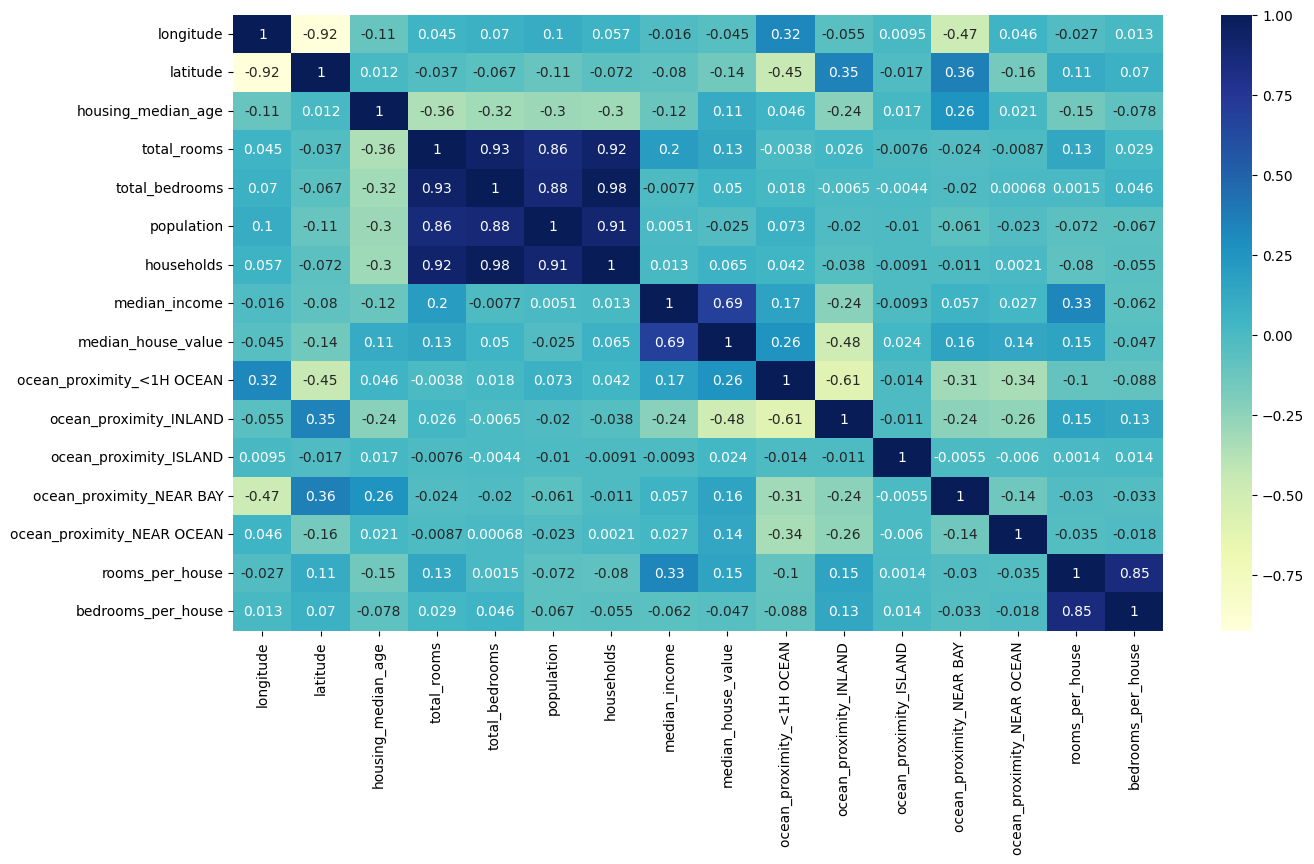

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot=True)

## Model Training

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['median_house_value'], axis=1)
Y = pd.DataFrame(df.median_house_value)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.75, random_state = 42)

### Data Scaling/Transforming

In [17]:
from sklearn.preprocessing import QuantileTransformer
quant_trnsfrmr = QuantileTransformer()

In [18]:
x_train_td = quant_trnsfrmr.fit_transform(x_train)
x_test_td = quant_trnsfrmr.transform(x_test)

### Importing Models for training

In [19]:
# list of models tried/used
# #models_used = ['Lin_reg', 'hub_reg', 'ran_forest_reg', 
#                'svm-svr(kernels="rbf","poly","linear","sigmoid")/nu_svr/lin_svr', 'kn_reg', 
#                'mlpreg']

In [20]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor

### RandomizedSearchCV to find the best performing features and ML algorithm

In [22]:
# mi_scores = mutual_info_regression(X, np.ravel(Y))

In [23]:
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=mutual_info_regression)),
     ('regressor', RandomForestRegressor())
])

In [24]:
par_grid = [
    {'regressor': [RandomForestRegressor(random_state=42)], 
    'regressor__n_estimators': [10, 100, 200, 400],
     'feature_selection__k': [5, 7, 9, 11, 12, 13]
    },
    {'regressor': [KNeighborsRegressor()],
    'regressor__n_neighbors': [5, 10, 20], 
    'regressor__weights': ['uniform', 'distance'],
    'feature_selection__k': [5, 7, 9, 11, 12, 13]
    },
    {'regressor': [AdaBoostRegressor(random_state=42)],
    'regressor__n_estimators': [10, 50, 100, 150, 200], 
    'regressor__learning_rate': [0.01, 0.1, 0.5],
    'feature_selection__k': [5, 7, 9, 11, 12, 13]
    },
    {'regressor': [BaggingRegressor(random_state=42, bootstrap=True)],
    'regressor__n_estimators': [5, 10, 20, 50, 100],
    'regressor__max_samples': [0.1, 0.2, 0.5, 0.7, 1.0],
    'feature_selection__k': [5, 7, 9, 11, 12, 13]
    },
    {'regressor': [ExtraTreesRegressor(random_state=42, bootstrap=True)],
    'regressor__n_estimators': [50, 100, 200, 400],
    'regressor__max_samples': [0.1, 0.2, 0.5, 0.7, 1.0],
    'feature_selection__k': [5, 7, 9, 11, 12, 13]
    },
    {'regressor': [HistGradientBoostingRegressor(random_state=42)], 
    'regressor__max_iter': [50, 100, 200, 500, 1000],
    'regressor__learning_rate': [0.01, 0.1, 0.5],
    'feature_selection__k': [5, 7, 9, 11, 12, 13]
    }
]

In [25]:
rand_search = RandomizedSearchCV(estimator=pipeline, param_distributions=par_grid, cv=5, n_iter=50, scoring='r2', random_state=42)

In [26]:
rand_search.fit(x_train_td, np.ravel(y_train))

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('feature_selection',
                                              SelectKBest(score_func=<function mutual_info_regression at 0x000002A15A1ECD30>)),
                                             ('regressor',
                                              RandomForestRegressor())]),
                   n_iter=50,
                   param_distributions=[{'feature_selection__k': [5, 7, 9, 11,
                                                                  12, 13],
                                         'regressor': [RandomForestRegressor(random_state=42)],
                                         'regressor__n_estimators': [10, 100,
                                                                     20...
                                         'regressor': [ExtraTreesRegressor(bootstrap=True,
                                                                           random_state=42)],
                                         'regressor__max_samples': [0.1, 0.2,
                                                                    0.5, 0.7,
                                                                    1.0],
                                         'regressor__n_estimators': [50, 100,
                                                                     200,
                                                                     400]},
                                        {'feature_selection__k': [5, 7, 9, 11,
                                                                  12, 13],
                                         'regressor': [HistGradientBoostingRegressor(random_state=42)],
                                         'regressor__learning_rate': [0.01, 0.1,
                                                                      0.5],
                                         'regressor__max_iter': [50, 100, 200,
                                                                 500, 1000]}],
                   random_state=42, scoring='r2')

In [27]:
best_model = rand_search.best_estimator_
print(best_model)

Pipeline(steps=[('feature_selection',
                 SelectKBest(k=13,
                             score_func=<function mutual_info_regression at 0x000002A15A1ECD30>)),
                ('regressor',
                 HistGradientBoostingRegressor(max_iter=1000,
                                               random_state=42))])


In [28]:
k_best = best_model.named_steps['feature_selection']

In [29]:
best_features_mask = k_best.get_support()
best_features_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True])

In [30]:
best_features = X.columns[best_features_mask]

In [31]:
from sklearn.metrics import r2_score
y_pred = best_model.predict(x_test_td)
r2_score(y_test, y_pred)

0.8378293573818387

In [32]:
print(f'Accuracy: {round(best_model.score(x_test_td, y_test), 5)*100}%')

Accuracy: 83.783%


In [33]:
# GridSearchCV is computationally too expensive

# grid_search = GridSearchCV(estimator=pipeline, param_grid = par_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(x_train_td, np.ravel(y_train))

# best_estimator = grid_search.best_estimator_
# best_score = grid_search.best_score_
# best_params = grid_search.best_params_

### Training HistGradientBoostingRegressor on optimized features 

In [34]:
x_new_cols = X.columns[best_features_mask]
X_new = X[x_new_cols]

In [35]:
X_new.shape

(20433, 13)

In [36]:
x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(X_new, Y, test_size=0.25, random_state=42)

In [37]:
x_new_train_td = quant_trnsfrmr.fit_transform(x_new_train)
x_new_test_td = quant_trnsfrmr.transform(x_new_test)

In [38]:
hgb_reg = HistGradientBoostingRegressor(random_state=42)
hgb_reg.fit(x_new_train_td, np.ravel(y_new_train))

HistGradientBoostingRegressor(random_state=42)

In [59]:
ada_reg = AdaBoostRegressor(random_state=42)
ada_reg.fit(x_new_train_td, np.ravel(y_new_train))

AdaBoostRegressor(random_state=42)

In [60]:
bag_reg = BaggingRegressor(random_state=42, bootstrap=True)
bag_reg.fit(x_new_train_td, np.ravel(y_new_train))

BaggingRegressor(random_state=42)

In [62]:
ex_trees_reg = ExtraTreesRegressor(random_state=42, bootstrap=True)
ex_trees_reg.fit(x_new_train_td, np.ravel(y_new_train))

ExtraTreesRegressor(bootstrap=True, random_state=42)

In [42]:
forest = RandomForestRegressor(random_state=42)
knr = KNeighborsRegressor()

In [43]:
forest.fit(x_new_train_td, np.ravel(y_new_train))
knr.fit(x_new_train_td, np.ravel(y_new_train))

KNeighborsRegressor()

### Testing Regressors' Performances

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [68]:
y_pred_hgb = hgb_reg.predict(x_new_test_td)
y_pred_ada = ada_reg.predict(x_new_test_td)
y_pred_bag = bag_reg.predict(x_new_test_td)
y_pred_xtr = ex_trees_reg.predict(x_new_test_td)

In [40]:
hgb_reg.score(x_new_test_td, y_new_test)

0.8282869274980129

In [64]:
ada_reg.score(x_new_test_td, y_new_test)

0.482052665718708

In [65]:
bag_reg.score(x_new_test_td, y_new_test)

0.7953003484000561

In [66]:
ex_trees_reg.score(x_new_test_td, y_new_test)

0.7914083017528817

In [41]:
print(f'Accuracy: {round(r2_score(y_new_test, y_pred_hgb), 5)*100} %')

Accuracy: 82.829 %


In [46]:
y_pred_rfr = forest.predict(x_new_test_td)

In [54]:
y_pred_knr = knr.predict(x_new_test_td)

In [72]:
rfr_score = forest.score(x_new_test_td, y_new_test)
print('RandomForestRegressor: {} % accuracy'.format(round(rfr_score, 4)*100))

RandomForestRegressor: 81.64 % accuracy


In [52]:
# performance = {'SelectFromModel': ['max_features = 9->71.0%', 'max_features = 6-->70.0%', 'max_features = 4-->67.5%', 
#               'max_features = 5-->68.3%', 'max_features = 7-->70.0%', 'max_features = 8-->70.0%'],
#               'RFECV': ['71.0%']}

## Plotting Results

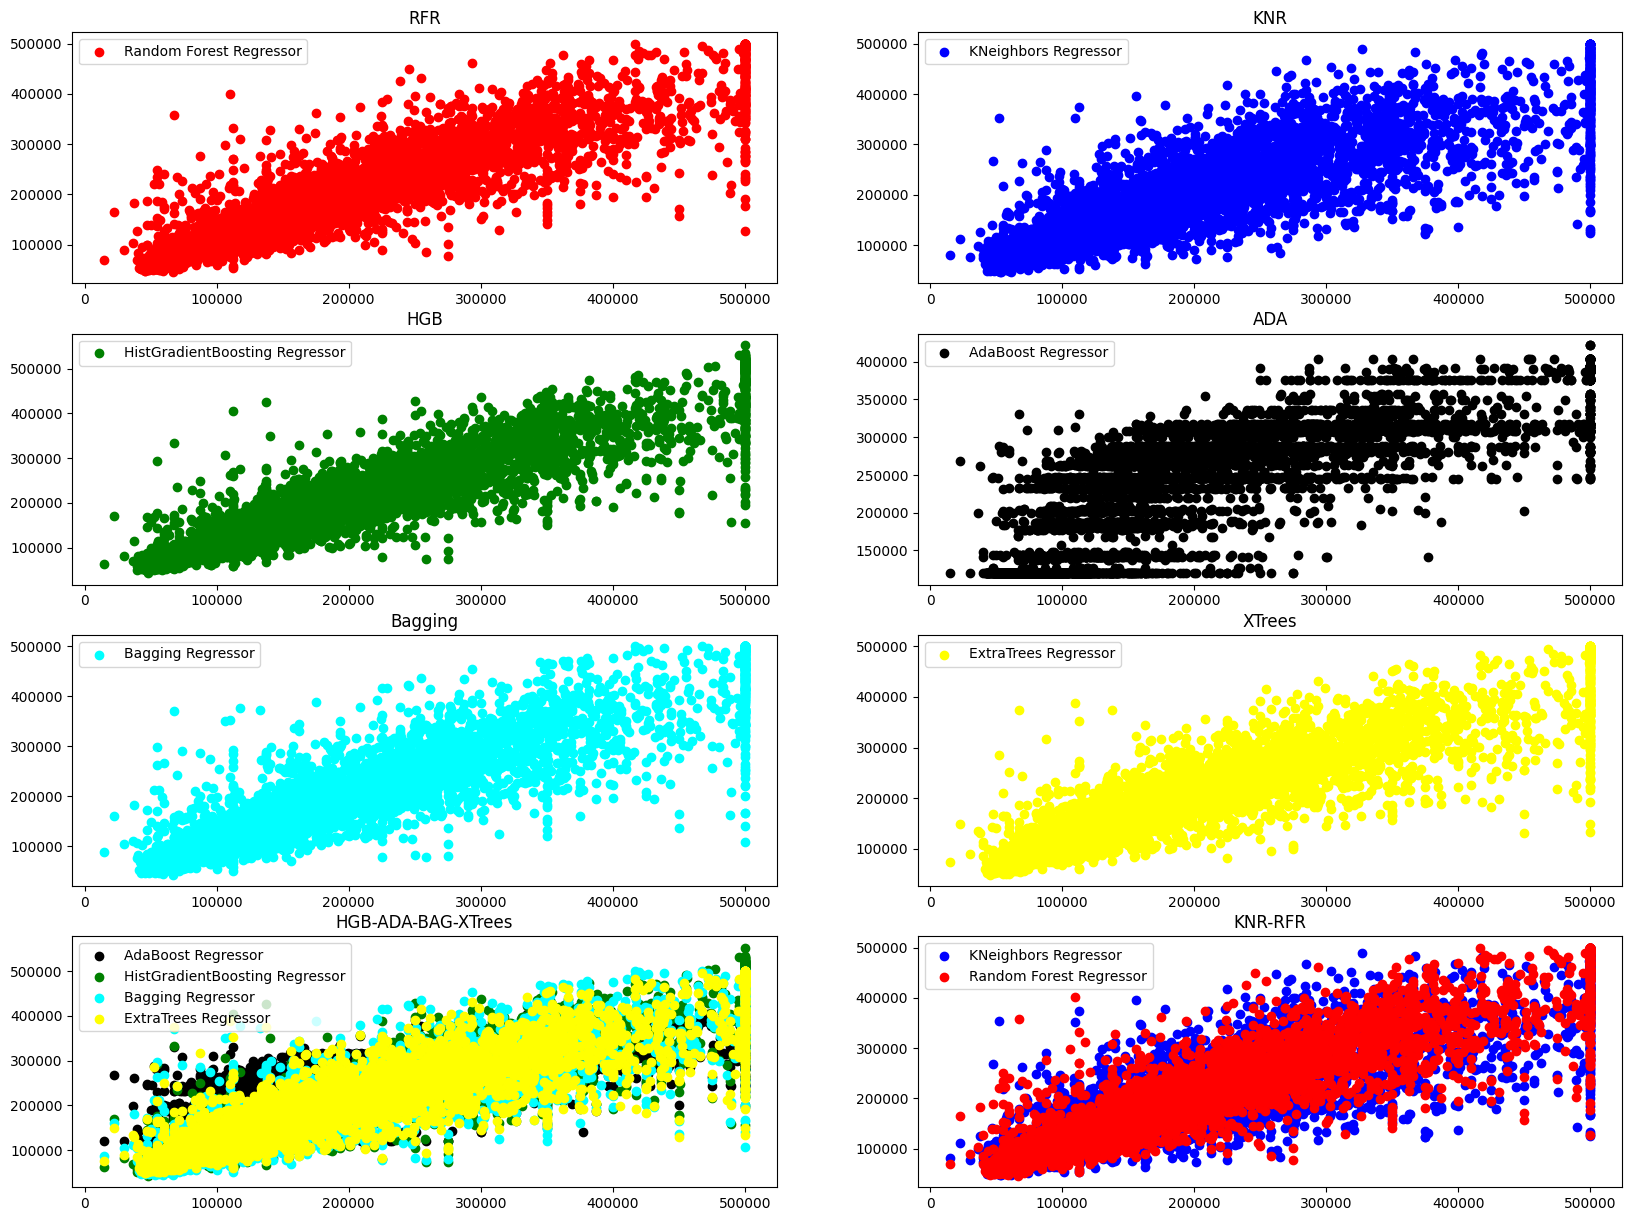

In [71]:
fig, axs = plt.subplots(4,2, figsize=(20,15))
# rfr algo
axs[0][0].scatter(y_new_test, y_pred_rfr, color='red', label='Random Forest Regressor')
axs[0][0].set_title('RFR')
axs[0][0].legend()
# knr algo
axs[0][1].scatter(y_new_test, y_pred_knr, color='blue', label='KNeighbors Regressor')
axs[0][1].set_title('KNR')
axs[0][1].legend()
# hgb_reg algo
axs[1][0].scatter(y_new_test, y_pred_hgb, color='green', label='HistGradientBoosting Regressor')
axs[1][0].set_title('HGB')
axs[1][0].legend()
# ada_reg algo
axs[1][1].scatter(y_new_test, y_pred_ada, color='black', label='AdaBoost Regressor')
axs[1][1].set_title('ADA')
axs[1][1].legend()
# bagging_reg algo
axs[2][0].scatter(y_new_test, y_pred_bag, color='cyan', label='Bagging Regressor')
axs[2][0].set_title('Bagging')
axs[2][0].legend()
# extra_trees_reg algo
axs[2][1].scatter(y_new_test, y_pred_xtr, color='yellow', label='ExtraTrees Regressor')
axs[2][1].set_title('XTrees')
axs[2][1].legend()
# hgb-ada-xtrees-bag combined
axs[3][0].scatter(y_new_test, y_pred_ada, color='black', label='AdaBoost Regressor')
axs[3][0].scatter(y_new_test, y_pred_hgb, color='green', label='HistGradientBoosting Regressor')
axs[3][0].scatter(y_new_test, y_pred_bag, color='cyan', label='Bagging Regressor')
axs[3][0].scatter(y_new_test, y_pred_xtr, color='yellow', label='ExtraTrees Regressor')
axs[3][0].set_title('HGB-ADA-BAG-XTrees')
axs[3][0].legend()
# knn-rfr combined
axs[3][1].scatter(y_new_test, y_pred_knr, color='blue', label='KNeighbors Regressor')
axs[3][1].scatter(y_new_test, y_pred_rfr, color='red', label='Random Forest Regressor')
axs[3][1].set_title('KNR-RFR')
axs[3][1].legend()
plt.show()

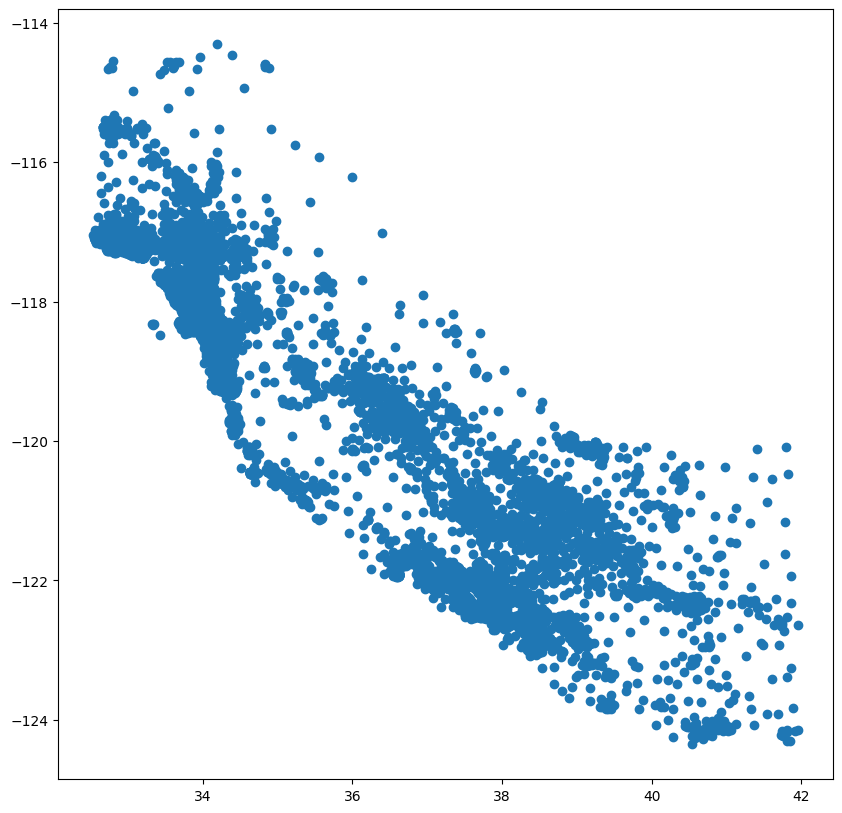

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(df['latitude'], df['longitude'])
plt.show()